Importamos cifar 10 y otras librerías

In [1]:
from keras.datasets import cifar10
from keras.layers.core import Dense, Activation
from keras.models import Sequential
from keras.utils import np_utils

/home/santiago/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Cargamos las imagenes de los datasets y las reformamos los tensores

In [3]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train = X_train.reshape(50000, 3072)
X_test = X_test.reshape(10000, 3072)

classes = 10
Y_train = np_utils.to_categorical(Y_train,classes)
Y_test = np_utils.to_categorical(Y_test,classes)

input_size = 3072
batch_size = 100
epochs = 100

Creamos la red

In [4]:
model = Sequential([
    Dense(1024, input_dim=input_size),
    Activation('relu'),
    Dense(512),
    Activation('relu'),
    Dense(512),
    Activation('sigmoid'),
    Dense(classes),
    Activation('softmax')
])

Compilamos y ejecutamos el modelo

In [5]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, Y_test), verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 21s 423us/step - loss: 2.2223 - acc: 0.1638 - val_loss: 2.1427 - val_acc: 0.1904
Epoch 2/100
50000/50000 [==============================] - 20s 401us/step - loss: 2.1071 - acc: 0.2015 - val_loss: 2.0886 - val_acc: 0.2136
Epoch 3/100
50000/50000 [==============================] - 20s 398us/step - loss: 2.0748 - acc: 0.2119 - val_loss: 2.0763 - val_acc: 0.1909
Epoch 4/100
50000/50000 [==============================] - 21s 416us/step - loss: 2.0655 - acc: 0.2180 - val_loss: 2.0426 - val_acc: 0.2237
Epoch 5/100
50000/50000 [==============================] - 21s 422us/step - loss: 2.0434 - acc: 0.2282 - val_loss: 2.0469 - val_acc: 0.2417
Epoch 6/100
50000/50000 [==============================] - 20s 406us/step - loss: 2.0489 - acc: 0.2334 - val_loss: 2.0250 - val_acc: 0.2452
Epoch 7/100
50000/50000 [==============================] - 20s 406us/step - loss: 2.0255 - acc: 0.2430 - val_l

Epoch 59/100
50000/50000 [==============================] - 20s 391us/step - loss: 2.2929 - acc: 0.1124 - val_loss: 2.2918 - val_acc: 0.1135
Epoch 60/100
50000/50000 [==============================] - 20s 392us/step - loss: 2.2872 - acc: 0.1161 - val_loss: 2.2921 - val_acc: 0.1097
Epoch 61/100
50000/50000 [==============================] - 20s 397us/step - loss: 2.2187 - acc: 0.1514 - val_loss: 2.1681 - val_acc: 0.1807
Epoch 62/100
50000/50000 [==============================] - 19s 388us/step - loss: 2.2007 - acc: 0.1630 - val_loss: 2.2132 - val_acc: 0.1650
Epoch 63/100
50000/50000 [==============================] - 19s 385us/step - loss: 2.2200 - acc: 0.1594 - val_loss: 2.2828 - val_acc: 0.1265
Epoch 64/100
50000/50000 [==============================] - 19s 388us/step - loss: 2.2852 - acc: 0.1210 - val_loss: 2.3112 - val_acc: 0.1000
Epoch 65/100
50000/50000 [==============================] - 19s 387us/step - loss: 2.3086 - acc: 0.1002 - val_loss: 2.3070 - val_acc: 0.1000
Epoch 66/100


Visualizamos algunas cuestiones

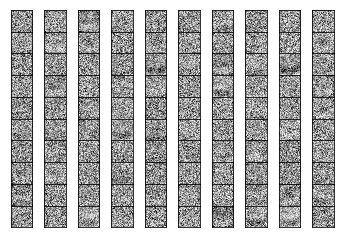

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import numpy
import random

fig = plt.figure()
outer_grid = gridspec.GridSpec(10, 10, wspace=0.0, hspace=0.0)

weights = model.layers[0].get_weights()
w = weights[0].T

for i, neuron in enumerate(random.sample(range(0, 1023), 100)):
    ax = plt.Subplot(fig, outer_grid[i])
    ax.imshow(numpy.mean(numpy.reshape(w[i], (32, 32, 3)), axis=2), cmap=cm.Greys_r)
    ax.set_xticks([])
    ax.set_yticks([])
    fig.add_subplot(ax)

plt.show()